In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv',index_col=0)


In [3]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:

df.shape

(200, 4)

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No Null values in this data set


In [7]:
df.loc[df['sales']== " "]

,TV,radio,newspaper,sales


# Dependent and independant variable 

Sales is the dependent variable
TV,Radio and nbewspaper columns are independent variable

In [8]:
df['sales'].unique

<bound method Series.unique of 1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64>

Since the values in sales column is more than 2 this is a Regression problem 

# EDA

Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

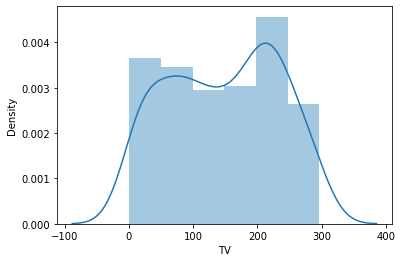

In [9]:
sns.distplot(df['TV']) 

<AxesSubplot:xlabel='radio', ylabel='Density'>

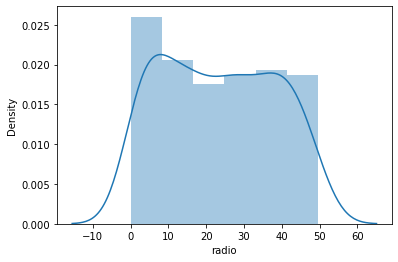

In [10]:
sns.distplot(df['radio']) 

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

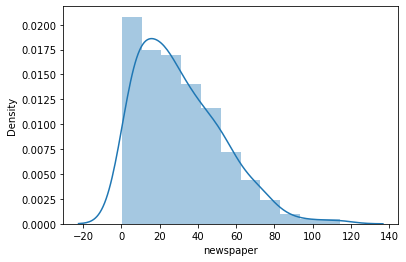

In [11]:
sns.distplot(df['newspaper']) 

All three columns are not normally distributed 

# Boxplot for outliers 

<AxesSubplot:xlabel='TV'>

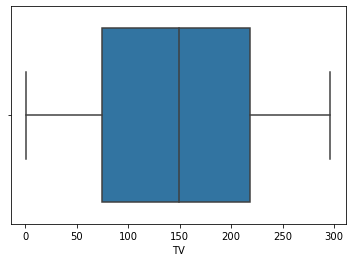

In [12]:
sns.boxplot(df['TV'])

<AxesSubplot:xlabel='radio'>

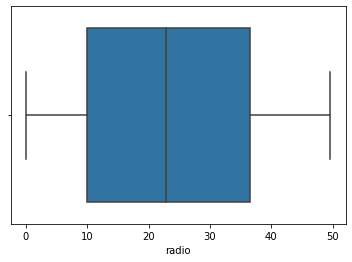

In [13]:
sns.boxplot(df['radio'])

<AxesSubplot:xlabel='newspaper'>

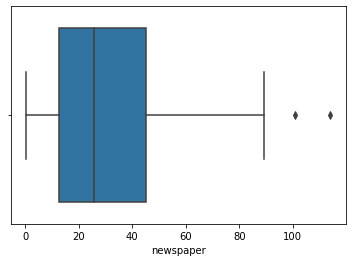

In [14]:
sns.boxplot(df['newspaper'])

Only newspaper column has outliers and needs to be treated


Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

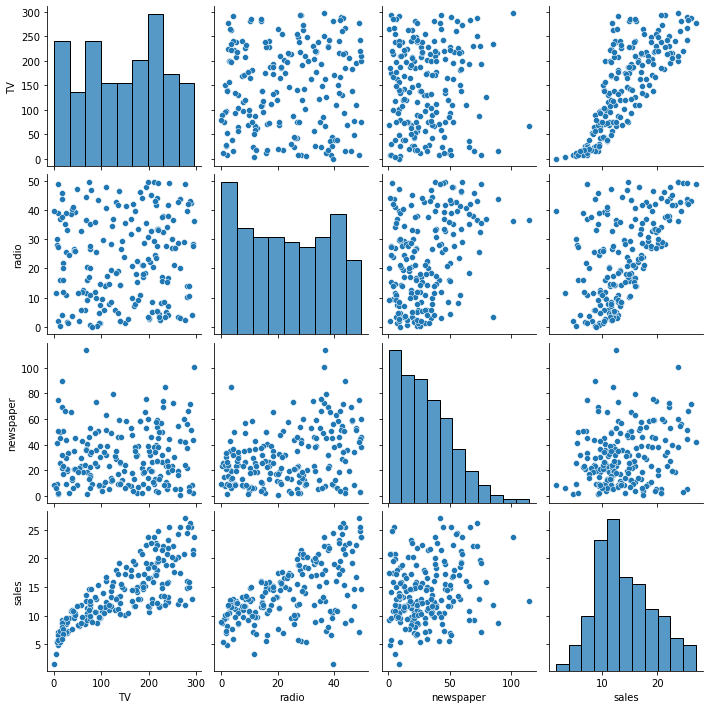

In [15]:

sns.pairplot(df)
plt.show

TV and sales are having  correlation

In [16]:
cor=df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

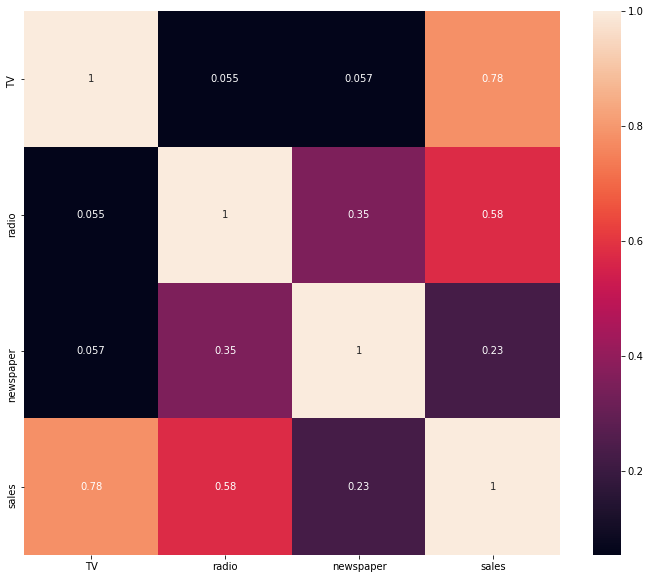

In [17]:
fig, ax_size = plt.subplots(figsize=(12,10))
sns.heatmap(cor,annot=True,ax=ax_size)

TV column is highly correlated with sales (0.78). Radio has next highest correlation with sales 

# Mulicollinearity check with VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [19]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

In [20]:

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                              for i in range(len(df.columns))]
print(vif_data)

     feature        VIF
0         TV  23.198876
1      radio  12.570312
2  newspaper   3.153498
3      sales  55.303920


Sales column has highest value but can be ignored here as there are only three columns we are applying no effect on it


# Removing Outliers

In [21]:
from scipy.stats import zscore

z=np.abs(zscore(df))

df1=df [(z<3).all(axis=1) ]

In [22]:
df1.shape

(198, 4)

Data loss
200-198/200

1% is less than 8% hence df1 can be considered

# Removal of Skewness

In [23]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

# Defining Dependant and independent variable

In [24]:
x=new_df.drop('sales',axis=1)
y=new_df['sales']

NameError: name 'new_df' is not defined

In [ ]:
x

In [ ]:
y

# Scaling the data using Min-Max Scaler:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

# Linear Regression

In [ ]:
lr.fit(x_train,y_train)

In [ ]:

lr.score(x_train,y_train)

In [ ]:
pred_test=lr.predict(x_test)

In [ ]:
print(r2_score(y_test,pred_test))

In [ ]:
from sklearn.model_selection import cross_val_score
cvscorelr= cross_val_score(lr,x_train,y_train, scoring = 'r2', cv=5)
cv_mean_lr=cvscorelr.mean()
cv_mean_lr


# Random Forest Regressor Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:

rf= RandomForestRegressor(criterion="mse", max_features ="log2")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

In [ ]:
rf.score(x_train,y_train)

# Lasso Regression Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [ ]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
ls = Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

In [ ]:

cvscorels=cross_val_score(ls,x,y,cv=5)
cv_mean_ls=cvscorels.mean()
cv_mean_ls

In [ ]:

pred_testls=ls.predict(x_test)

In [ ]:

print(r2_score(y_test,pred_testls))

# Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:

rd = Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

In [ ]:
cvscorerd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cvscorerd.mean()
cv_mean_rd

In [ ]:
pred_testrd=rd.predict(x_test)

In [ ]:
print(r2_score(y_test,pred_testrd))

# Difference between R2 score and CV score


Linear Regression = 90- 78.6 = 11.4

Random ForestRegressor = 90 - 81.6 = 8.4

Lasso regression = 92.3 - 88.6 = 3.7

Ridge Regression = 88.5 - 78.47 = 10.5

Least difference is with Lasso Regression. So proceeding with same

# Ensemble technique

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=10, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
import pickle
filename = 'sales.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:

loaded_model = pickle.load(open('sales.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

In [ ]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [ ]:
conclusion

Predicted=Original

In [ ]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()